# Three species 

In [1]:
from IPython.display import HTML      # For animation.
from matplotlib import animation      # For animation.
from matplotlib import pyplot as plt  # For plotting.
import numpy as np                    # For solving ODE.
from scipy.integrate import odeint    # For solving ODE.

## Model 

In [10]:
# Parameters.
a = 0.5
b = 0.01
c = 0.1
d = 0.01
e = 0.01  # Try this value 0.1
f = 0.5
g = 0.01

t0 = 0.0
t1 = 50.0
y0 = [10, 25, 5]  # Initial population of species 0, 1 and 2.

# Model.
# F = lambda y, t: [
#     y[0] * (a - b * y[1]),   # How population 0 changes.
#     y[1] * (-c + d * y[0]),  # How population 1 changes.
# ]

# TODO: Extend the 2-species model above to 3 species.
# Use the parameters a, b, c, d, e, f, g defined above.
F = lambda y, t: [
    y[0] * (a - b * y[1]),              # How population 0 changes.
    y[1] * (-c + d * y[0] - e * y[2]),  # How population 1 changes.
    y[2] * (-f + g * y[1]),             # How population 2 changes.
]

In [11]:
# Solve ODE.
t = np.linspace(t0, t1, 1000)
y = odeint(F, y0, t)

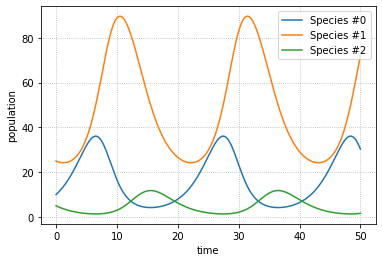

In [12]:
plt.plot(t, y[:, 0], label='Species #0')
plt.plot(t, y[:, 1], label='Species #1')
plt.plot(t, y[:, 2], label='Species #2')
plt.xlabel('time')
plt.ylabel('population')
plt.grid(linestyle=':')
plt.legend()
plt.show()

## Animation 

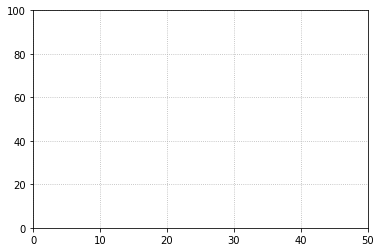

In [5]:
# Same plot, but as an animation.
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
FRAMES = 200

fig, ax = plt.subplots()
ax.grid(linestyle=':')
ax.set_xlim((t0, t1))  # Range of x-axis.
ax.set_ylim((0, 100))  # Range of y-axis.

line0 = ax.plot([], [], lw=2)[0]
line1 = ax.plot([], [], lw=2)[0]
line2 = ax.plot([], [], lw=2)[0]

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return [line0, line1, line2]

def animate(i):
    # Take only first (i/FRAMES) points.
    k = len(t) * i // FRAMES
    line0.set_data(t[:k], y[:k, 0])
    line1.set_data(t[:k], y[:k, 1])
    line2.set_data(t[:k], y[:k, 2])
    return [line0, line1, line2]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=FRAMES, interval=50, blit=True)

In [6]:
HTML(anim.to_html5_video())